In [2]:
# Importar pandas y cargar los datos
import pandas as pd

data = pd.read_csv("titanic.csv")
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Hacer algunas estadisticas resumiendo

# df.shape: muestra las dimensiones de nuestra data, cuantas filas y columnas
print("Total de pasajeros:", data.shape[0])

# Podemos filtrar por el valor de alguna columna
sobreviven = data[data['Survived'] == 1]

# Manera fancy de mostrar los resultados
print("Sobrevivieron:      {} ({:.2f}%)".format(sobreviven.shape[0], 
                                                sobreviven.shape[0] / data.shape[0] * 100.0))

# Una columna es un objeto de tipo pd.Series, y la funcion .mean() nos calcula el promedio
# Nota: Pandas ofrece la funcion groupby() para agrupar por los distintos valores de una columna
promedio_guita = data['Fare'].mean()
promedio_guita_vivos = sobreviven['Fare'].mean()

print("Promedio Guita:     {:.2f} (General), {:.2f} (Solo Sobrevivientes)".format(promedio_guita, promedio_guita_vivos))

# Otro indicador básico interesante es la mediana:
mediana_guita = data['Fare'].median()
mediana_guita_vivos = sobreviven['Fare'].median()

print("Mediana Guita:      {:.2f} (General), {:.2f} (Solo Sobrevivientes)".format(mediana_guita, mediana_guita_vivos))

# Para ver la distribución, podemos mirar la desviacion estándar de la muestra
varianza_guita = data['Fare'].std()
varianza_guita_vivos = sobreviven['Fare'].std()

print("Desviación Guita:   {:.2f} (General), {:.2f} (Solo Sobrevivientes)".format(varianza_guita, varianza_guita_vivos))


Total de pasajeros: 891
Sobrevivieron:      342 (38.38%)
Promedio Guita:     32.20 (General), 48.40 (Solo Sobrevivientes)
Mediana Guita:      14.45 (General), 26.00 (Solo Sobrevivientes)
Desviación Guita:   49.69 (General), 66.60 (Solo Sobrevivientes)


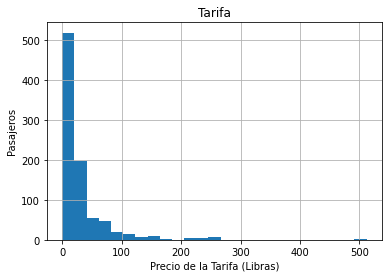

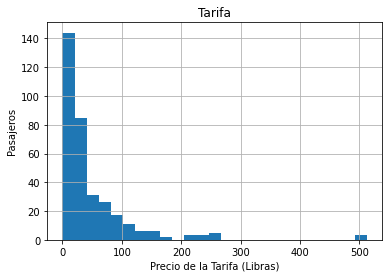

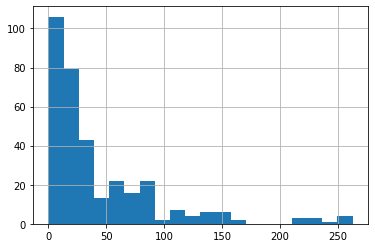

44.289798820059


In [4]:
# Hacer grafiquitos
import matplotlib.pyplot as plt

# hist() sirve para armar un histograma
data['Fare'].hist(bins=25)

# Esto controla como se ve el gráfico y las referencias
plt.title('Tarifa')
plt.xlabel('Precio de la Tarifa (Libras)')
plt.ylabel('Pasajeros')

# Mostrar el gráfico
plt.show()

sobreviven['Fare'].hist(bins=25)
plt.title('Tarifa')
plt.xlabel('Precio de la Tarifa (Libras)')
plt.ylabel('Pasajeros')
plt.show()

# Detectamos que hay un dato raro: una sola persona pagó más de 500 libras. Saquemos al outlier!
sin_outlier = sobreviven[sobreviven["Fare"] < 300]["Fare"]
sin_outlier.hist(bins=20)
plt.show()

print(sin_outlier.mean())

# Mostrar otros tipos de graficos: scatterplot, boxplot

In [26]:
# Por ahora vemos el siguiente modelo: Arbol de Decision
from sklearn import tree
from sklearn.model_selection import train_test_split


# Hay que convertir la columna "Sex" a un numero
def generoANumero(genero):
  return int(genero == "female")
# Desechamos datos incompletos con .dropna()
todos = data[["Fare","Sex","Pclass","Age","Survived"]].dropna()
predictores = todos[["Fare","Sex","Pclass","Age"]]
predictores["Sex"] = predictores["Sex"].apply(generoANumero)
a_predecir  = todos["Survived"]
X_train, X_test, y_train, y_test = train_test_split(predictores, a_predecir, test_size=0.2)

print(a_predecir.shape[0])


for i in range(1,21):
  modelo = tree.DecisionTreeClassifier(max_depth=i)
  modelo = modelo.fit(X_train, y_train)
  print(f"Usando {i} preguntas la precision es de: {modelo.score(X_test,y_test)} y usa {modelo.get_depth()}")
  print(f"Usando {i} preguntas la precision es de: {modelo.score(X_train,y_train)} sobre el train y usa {modelo.get_depth()}")
  #tree.plot_tree(modelo)
  #r = tree.export_text(modelo, feature_names=predictores.columns.values.tolist())
  #print(r)

714
Usando 1 preguntas la precision es de: 0.7832167832167832 y usa 1
Usando 1 preguntas la precision es de: 0.7793345008756567 sobre el train y usa 1
Usando 2 preguntas la precision es de: 0.7762237762237763 y usa 2
Usando 2 preguntas la precision es de: 0.7950963222416813 sobre el train y usa 2
Usando 3 preguntas la precision es de: 0.7902097902097902 y usa 3
Usando 3 preguntas la precision es de: 0.819614711033275 sobre el train y usa 3
Usando 4 preguntas la precision es de: 0.7692307692307693 y usa 4
Usando 4 preguntas la precision es de: 0.840630472854641 sobre el train y usa 4
Usando 5 preguntas la precision es de: 0.8041958041958042 y usa 5
Usando 5 preguntas la precision es de: 0.8669001751313485 sobre el train y usa 5
Usando 6 preguntas la precision es de: 0.7902097902097902 y usa 6
Usando 6 preguntas la precision es de: 0.8791593695271454 sobre el train y usa 6
Usando 7 preguntas la precision es de: 0.7692307692307693 y usa 7
Usando 7 preguntas la precision es de: 0.901926444

/tmp/ipykernel_31872/1379584776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictores["Sex"] = predictores["Sex"].apply(generoANumero)


In [36]:
# (elijo) Importo modelo
from sklearn.neighbors import KNeighborsClassifier

  # Configuro el modelo
predictores["Fare"] /= predictores["Fare"].max()
X_train, X_test, y_train, y_test = train_test_split(predictores, a_predecir, test_size=0.2)

for i in range(0,31,3):
    if i == 0:
        continue
    modelo = KNeighborsClassifier(n_neighbors=i)

    # Ajusto el modelo
    modelo.fit(X_train, y_train)

    # Predigo con el modelo que ajuste
    y_pred = pd.Series(modelo.predict(X_test), index = y_test.index)

    ## Ver el error
    result = pd.DataFrame(pd.concat([y_pred, y_test], axis = 1))
    result.columns = ['prediccion', 'verdadero']

    ## Accuracy (porcentaje de acierto)
    porcentaje = 100*sum(result.prediccion == result.verdadero)/len(result.prediccion)
    if i % 3 == 0:
        print(f"{i} vecinos {porcentaje}")

3 vecinos 72.72727272727273
6 vecinos 75.52447552447552
9 vecinos 74.82517482517483
12 vecinos 74.12587412587412
15 vecinos 74.82517482517483
18 vecinos 74.12587412587412
21 vecinos 73.42657342657343
24 vecinos 71.32867132867133
27 vecinos 69.23076923076923
30 vecinos 68.53146853146853


/tmp/ipykernel_31872/4173934661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictores["Fare"] /= predictores["Fare"].max()
